# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

In [3]:
north_df.info() #'Incoming Wait Time' only has 82 non-null entries out of 245, indicating significant missing data
north_df['Incoming Wait Time'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

In [4]:
south_df.info() ##'Incoming Wait Time' only has 126 non-null entries out of 314, indicating significant missing data
south_df['Incoming Wait Time'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

In [5]:
north_pattern = north_df.groupby('Incoming or Outgoing')['Incoming Wait Time'].count() 
print(north_pattern)



Incoming or Outgoing
Incoming    82
Outgoing     0
Name: Incoming Wait Time, dtype: int64


In [6]:
south_pattern = south_df.groupby('Incoming or Outgoing')['Incoming Wait Time'].count()
print(south_pattern)

Incoming or Outgoing
Incoming    126
Outgoing      0
Name: Incoming Wait Time, dtype: int64


In [7]:
north_duplicates = north_df.duplicated().sum()
south_duplicates = south_df.duplicated().sum()
print(f"Duplicates in north branch: {north_duplicates}")
print(f"Duplicates in south branch: {south_duplicates}")


Duplicates in north branch: 0
Duplicates in south branch: 0


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [8]:
# EDA Question 1A solution below:
# Count unique representatives in the North branch
num_reps_north = north_df['Rep ID'].nunique()
print(f"Number of reps in the North branch: {num_reps_north}")



Number of reps in the North branch: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [9]:
# EDA Question 1B solution Below:
num_reps_south = south_df['Rep ID'].nunique()
print(f"Number of reps in the south branch: {num_reps_south}")

Number of reps in the south branch: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [10]:
# EDA Question 2A solution Below:
average_busy_minutes = north_df['Busy Minutes'].mean()
average_not_ready_minutes = north_df['Not Ready Minutes'].mean()
average_incoming_wait_time = north_df['Incoming Wait Time'].mean()
average_during_call_wait_time = north_df['During Call Wait Time'].mean()
number_of_calls = north_df['Calls'].sum()
print(f'Average busy minutes in north branch is : {round(average_busy_minutes, 2)}')
print(f'Average not ready minutes in north branch is : {round(average_not_ready_minutes, 2)}')
print(f'Average incoming Wait Time in north branch is : {round(average_incoming_wait_time,2)}')
print(f'Average During Call Wait Time in north branch is : {round(average_during_call_wait_time,2)}')
print(f'total number of calls north branch is : {round(number_of_calls,2)}')

Average busy minutes in north branch is : 9.99
Average not ready minutes in north branch is : 1.91
Average incoming Wait Time in north branch is : 3.05
Average During Call Wait Time in north branch is : 2.97
total number of calls north branch is : 245


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [11]:
# EDA Question 2B solution Below:
average_busy_minutes = south_df['Busy Minutes'].mean()
average_not_ready_minutes = south_df['Not Ready Minutes'].mean()
average_incoming_wait_time = south_df['Incoming Wait Time'].mean()
average_during_call_wait_time = south_df['During Call Wait Time'].mean()
number_of_calls = south_df['Calls'].sum()

print(f'Average busy minutes in south branch is : {round(average_busy_minutes, 2)}')
print(f'Average not ready minutes in south branch is : {round(average_not_ready_minutes, 2)}')
print(f'Average incoming Wait Time in south branch is : {round(average_incoming_wait_time,2)}')
print(f'Average During Call Wait Time in south branch is : {round(average_during_call_wait_time,2)}')
print(f'total number of calls south branch is : {round(number_of_calls,2)}')

Average busy minutes in south branch is : 10.05
Average not ready minutes in south branch is : 1.91
Average incoming Wait Time in south branch is : 3.0
Average During Call Wait Time in south branch is : 3.08
total number of calls south branch is : 314


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [12]:
# EDA Question 3 solution Below:
combined_df = pd.concat([north_df, south_df], ignore_index=True)
calls_by_timeblock = combined_df.groupby('Time Block')['Calls'].sum().sort_index()
print(calls_by_timeblock)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11

- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time =  3.05
> - During Call Wait Time = 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [13]:
# Question 1 solution below
north_df.info() #'Incoming Wait Time' only has 82 non-null entries out of 245, indicating significant missing data
south_df.info() ##'Incoming Wait Time' only has 126 non-null entries out of 314, indicating significant missing data

north_pattern = north_df.groupby('Incoming or Outgoing')['Incoming Wait Time'].count() 
print(north_pattern)
south_pattern = south_df.groupby('Incoming or Outgoing')['Incoming Wait Time'].count()
print(south_pattern)
#shows that outgoing calls have missing data in Incoming wait time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

#### Record your answer below:

> Your Answer: "Incoming Wait Time" has missing data in both North and South data. However if you look at the pattern of the missing data, it is clear that only "Outgoing calls" have no Incoming Wait Time which makes sense so we can leave it as is.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [14]:
# Cleaning Question 2 solution below:

unique_sale_values = north_df['Sale'].unique()
print(f"Unique values in the 'Sale' column BEFORE strip: {unique_sale_values}")

north_df_striped = north_df

north_df_striped['Sale'] = north_df['Sale'].str.strip()
unique_sale_values = north_df_striped['Sale'].unique()

print(f"Unique values in the 'Sale' column AFTER strip: {unique_sale_values}")

Unique values in the 'Sale' column BEFORE strip: ['NO' 'YES ' 'YES']
Unique values in the 'Sale' column AFTER strip: ['NO' 'YES']


##### Record your answer by below:
> Your Answer: Based on the unique values we can see that there are 2 YES values. The reason is the extra space at the end of YES. This can be rectified bu using a strip function to remove extra spaces before and after the value.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [15]:
# Cleaning Question 3 solution below:

north_duplicates = north_df.duplicated().sum()
south_duplicates = south_df.duplicated().sum()

print(f"Duplicates in north branch: {north_duplicates}")
print(f"Duplicates in south branch: {south_duplicates}")


Duplicates in north branch: 0
Duplicates in south branch: 0


##### Record your answer below:
> Your Answer: There are not duplicates in the data sets

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

##### Record your answer below:
> Your Answer: All columns are necessary

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [16]:
# Create dataframe for the entire company named df
CallCenter_combined_df = pd.concat([south_df, north_df], ignore_index=True)
CallCenter_combined_df.head()
CallCenter_combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [17]:
# Manipulation Question 1 solution below:
Rep_highestcalls = CallCenter_combined_df.groupby(['Branch', 'Rep ID'])['Calls'].sum().reset_index()
Rep_highestcalls_sort = Rep_highestcalls.sort_values(['Branch','Calls'], ascending=[True,False])

Top_reps_by_branch = Rep_highestcalls_sort.groupby('Branch').first().reset_index()

print("Representative with the highest number of calls in each branch:")
print(Top_reps_by_branch)



Representative with the highest number of calls in each branch:
  Branch Rep ID  Calls
0  North  Brent     37
1  South   Eric     35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric  35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [18]:

branch_totals = CallCenter_combined_df.groupby('Branch').sum()
branch_rates = branch_totals['Abandoned'] / branch_totals['Calls']
branch_rates_formatted = branch_rates.map("{:.2%}".format) #format branch rates as percentage

print("Call abandonment rate by branch:")
print(branch_rates_formatted)


company_rate = CallCenter_combined_df['Abandoned'].sum() / CallCenter_combined_df['Calls'].sum() #overall company abandonment rate
print(f"\nOverall company abandonment rate: {company_rate:.2%}")


def check_if_rate_is_good(rate):
    if rate < 0.02:
        return 'Needs improvement (below 2%)'
    elif rate <= 0.05:
        return 'Good (within 2-5% range)'
    else:
        return 'Needs improvement (above 5%)'

branch_status = branch_rates.map(check_if_rate_is_good)
company_status = check_if_rate_is_good(company_rate)

branch_comparison = pd.concat([branch_rates_formatted, branch_status], axis=1)
branch_comparison.columns = ['Rate', 'Status']

print("\nComparison to optimal range (2-5%):")
print(branch_comparison)

print("\nOverall company performance:")
print(f"Company: {company_rate:.2%} - {company_status}")

Call abandonment rate by branch:
Branch
North    2.86%
South    1.27%
dtype: object

Overall company abandonment rate: 1.97%

Comparison to optimal range (2-5%):
         Rate                        Status
Branch                                     
North   2.86%      Good (within 2-5% range)
South   1.27%  Needs improvement (below 2%)

Overall company performance:
Company: 1.97% - Needs improvement (below 2%)


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86% - within range
- South Branch = 1.27% - Out of range
- Company Wide = 1.97% - Out of range
- Do any of these fall out of the optimal range of 2-5%? Yes - South Branch and Company Wide are below 2%. Since Company wide is barely below 2 and can be rounded up we can ignore that if needed. However, South Branch is well below 2%

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [19]:
incoming_calls = CallCenter_combined_df[CallCenter_combined_df['Incoming or Outgoing'] == 'Incoming']
branches = ['North', 'South', 'Company Wide']
results = []

for branch in branches:
    if branch != 'Company Wide':
        calls = incoming_calls[incoming_calls['Branch'] == branch]
    else:
        calls = incoming_calls
    
    total_calls = len(calls)
    calls_within_2s = sum(calls['Incoming Wait Time'] <= 2)
    service_level = (calls_within_2s / total_calls) * 100
    
    results.append((branch, service_level, calls_within_2s, total_calls))

print("Percentage of calls answered within 2 seconds (Incoming calls only):")
for branch, service_level, calls_within_2s, total_calls in results:
    print(f"{branch}: {service_level:.2f}% and {calls_within_2s} calls out of {total_calls} total calls")

Percentage of calls answered within 2 seconds (Incoming calls only):
North: 40.24% and 33 calls out of 82 total calls
South: 38.10% and 48 calls out of 126 total calls
Company Wide: 38.94% and 81 calls out of 208 total calls


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls out of 82 total calls
- South Branch = 38.10% and 48 calls out of 126 total calls
- Company Wide = 38.94% and 81 calls out of 208 total calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [20]:

incoming_calls = CallCenter_combined_df[CallCenter_combined_df['Incoming or Outgoing'] == 'Incoming']
branches = ['North', 'South', 'Entire Company']
print("Average Speed of Answer (in seconds):")

for branch in branches:
    if branch == 'Entire Company':
        calls = incoming_calls
    else:
        calls = incoming_calls[incoming_calls['Branch'] == branch]
    
    if len(calls) > 0:
        average_wait_time = calls['Incoming Wait Time'].mean()
        print(f"{branch}: {average_wait_time:.2f}")
    else:
        print(f"{branch}: No data available")

Average Speed of Answer (in seconds):
North: 3.05
South: 3.00
Entire Company: 3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\dhivy\AppData\Local\Temp\ipykernel_18204\14385678.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


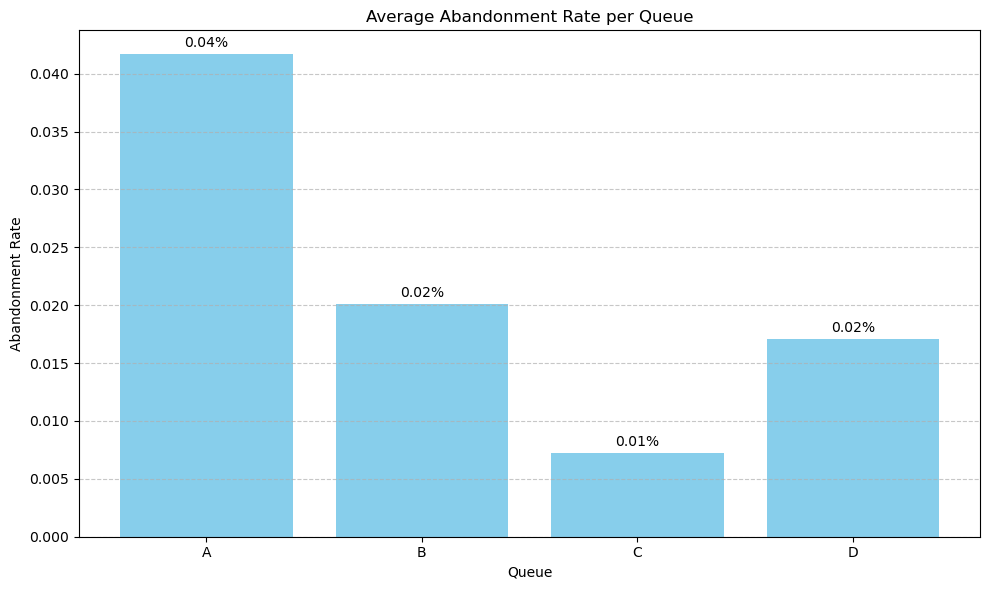

In [26]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = CallCenter_combined_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
#Your code below:

plt.figure(figsize=(10, 6))
bars = plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color='skyblue')

plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')

plt.bar_label(bars, fmt='%.2f%%', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chosee a bar chart as this is for comparison among items with just 4 categories. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

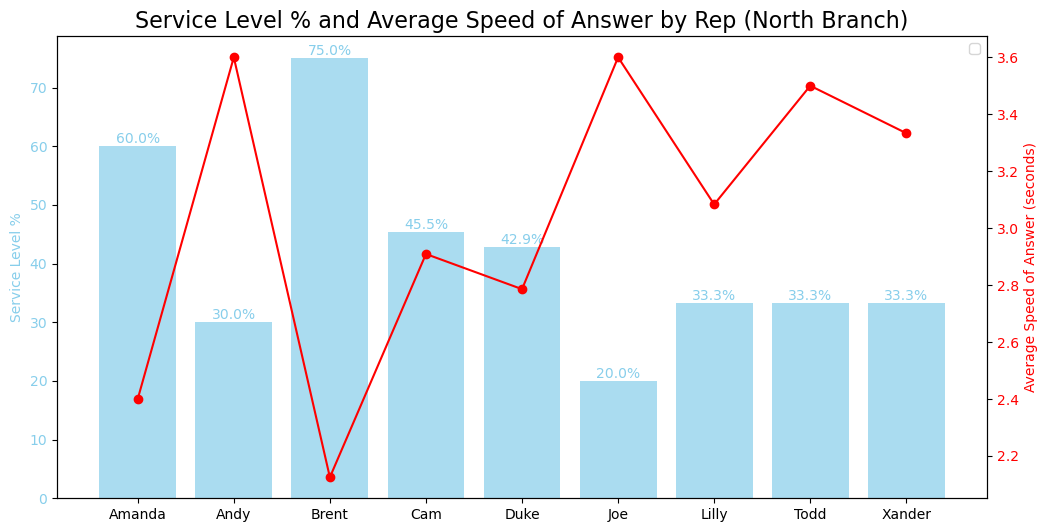

In [22]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north = north_df
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


combined_data = pd.merge(service_level, north_plt, on="Rep ID")

fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(combined_data["Rep ID"], combined_data["Service Level %"], color='skyblue', alpha=0.7)
ax1.set_ylabel("Service Level %", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(combined_data["Rep ID"], combined_data["Incoming Wait Time"], color='red', marker='o')
ax2.set_ylabel("Average Speed of Answer (seconds)", color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title("Service Level % and Average Speed of Answer by Rep (North Branch)", fontsize=16)
plt.xticks(rotation=45, ha='right')


ax1.bar_label(bars, fmt='%.1f%%', label_type='edge', color='skyblue')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Service Level %', 'Avg Speed of Answer'], loc='upper right')

plt.show()

##### Record your answer below:

> Chart style you chose and why: I used a mixed chart with both line and bar elements. This shows both the information and lets the user correlate the 2 different information. For example Brent has low speed of answer and that corresponds to higher service level %age. I tried using grouped column chart but that didn't show the correlation well

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


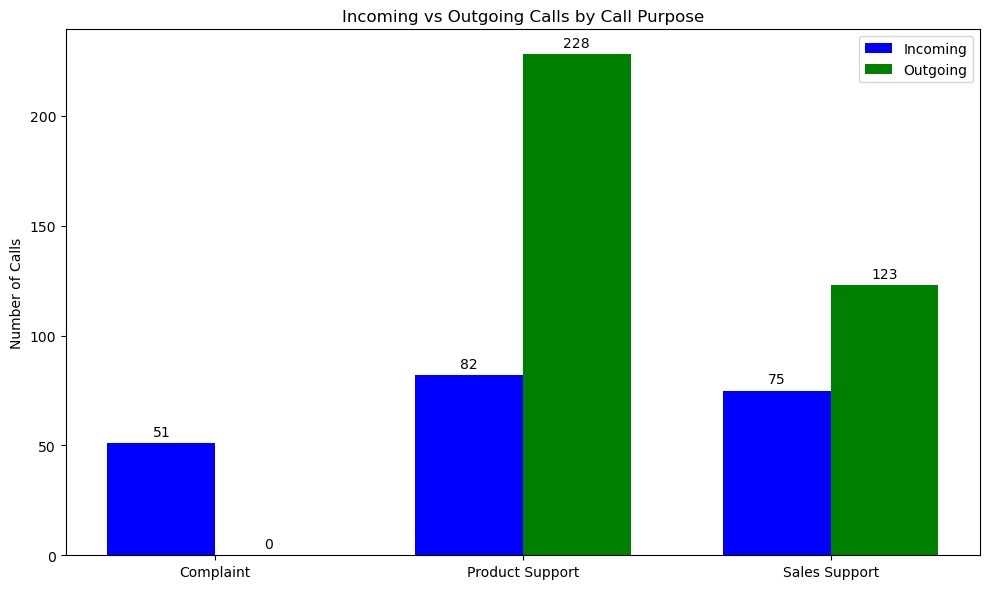

In [23]:

# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
df = CallCenter_combined_df
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


purposes = ['Complaint', 'Product Support', 'Sales Support']
incoming = [complaints.get('Incoming', 0), product_support.get('Incoming', 0), sales_support.get('Incoming', 0)]
outgoing = [complaints.get('Outgoing', 0), product_support.get('Outgoing', 0), sales_support.get('Outgoing', 0)]


fig, ax = plt.subplots(figsize=(10, 6))


width = 0.35
x = range(len(purposes))


incoming_bars = ax.bar([i - width/2 for i in x], incoming, width, label='Incoming', color='blue')
outgoing_bars = ax.bar([i + width/2 for i in x], outgoing, width, label='Outgoing', color='green')


ax.set_ylabel('Number of Calls')
ax.set_title('Incoming vs Outgoing Calls by Call Purpose')
ax.set_xticks(x)
ax.set_xticklabels(purposes)
ax.legend()


ax.bar_label(incoming_bars, padding=3)
ax.bar_label(outgoing_bars, padding=3)


plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: Chart style you chose and why: I chose a grouped bar chart because it is for comparison where you can see the comparison between the Incoming Vs Outgoing per category and also across categories very easily

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
The South branch appears to be operating more efficiently overall. Here's why:

>Call abandnment rate: The South branch has a significantly lower abandonment rate (1.27% vs 2.86%). This means fewer callers are hanging up before being served, indicating better customer satisfaction and potentially fewer lost business opprtunities.

>Average Speed of Answer: The South branch is slightly faster in answering calls (3.00 seconds vs 3.05 seconds). While the difference is small, it still favors the south branch.

>Service level: The North branch has a slightly higher percentage of calls answered within 2 seconds (40.24% vs 38.10%). This is the only metric where the North branch performs better, but the difference is relatively s>mall.

Considering these factors, the South branch seems more efficient because Its significantly lower abandonment rate suggests better overall customer experience and potentially higher customer rtention.
It maintains a comparable service level and average speed of answer to the North branch, while handling more calls (314 vs 245) with only slightly more reps (11 vs 9).




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The North branch would likely benefit more from extra help. It is because they have fewer reps (9 vs 11) handling a similar workload per person. North has higher call abandonment rate (2.86% vs 1.27%) and slightly longer average wait times. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
 It will be nice to have more data since the difference in metrics between the call centers isn't much. It will good to have Customer Satisfaction Scores based on survey and Reason for Call abondonment. It is also be good to get a complexity score for the call issue which will explain wait times. 

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:
